# Лабораторная работа 7. Библиотеки. Научный Python 1.
# Линейные и нелинейные уравнения.

Загрузим необходимые для работы библиотеки: 

In [3]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.optimize import root # описание библиотеки: https://docs.scipy.org/doc/scipy/reference/optimize.html

import math
import time
import pylab

sm.init_printing()
%matplotlib notebook

# 1. Линейная алгебра

Массивы бывают 1-мерные (вектора) 2-мерные (матрицы) и многомерные.

Все элементы массива должны принадлежать к одному типу данных.

Создадим одномерный массив из списка при помощи функции array:

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

Создадим двумерный массив из списка при помощи функции array. Обратите внимание на скобки.

In [3]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Для создания специфических массивов надо использовать специальные методы. Нарпимер, zeros создаёт массив нулей.

In [4]:
np.zeros(3)

array([0., 0., 0.])

Для создания единично матрицы используется функция eye.

In [5]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Для получения случайных чисел из нормального распределения используем функцию randn() из модуля random. Для создания матрицы случайных чисел надо передать функции два числа задающих диапазон случайных значений [10, 100] и размерность матрицы (3, 5)

In [41]:
arr = np.random.uniform(10, 100, (3, 5))
arr

array([[77.79818224, 45.17662667, 49.24245538, 56.94947485, 96.85172624],
       [54.67026497, 42.18805964, 14.17537471, 76.44178754, 26.8780247 ],
       [65.01567421, 38.51954214, 79.47315194, 84.10918829, 57.77110943]])

Можно получать различные срезы массивов, используя синтаксис
>массив[от строки : до строки (не включая) : шаг , от столбца : до столбца (не включая) : шаг]

Элементы одной строки

In [7]:
arr[0, 0:5:2]  #  arr[номер строки , от столбца : до столбца : шаг]

array([42.09490168, 57.9177282 , 83.79904012])

Чтобы вывести элементы всех строк или столбцов можно написать [:]

In [8]:
arr[:, 0:5:2]

array([[42.09490168, 57.9177282 , 83.79904012],
       [98.99599498, 73.029601  , 58.1519741 ],
       [75.88903251, 12.12810682, 49.24129622]])

К массиву можно применять арифметические и логические операции (при этом эта операция будет применена к каждому элементу):

In [9]:
arr < 50

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True, False,  True]])

# Основные операции над матрицами и решение СЛАУ

#### Основные операции над матрицами

In [42]:
# определение матрицы
A = np.array([[1, 2], [3, 4]])
print('A =\n', A)

# вычисление определителя матрицы
detA = linalg.det(A)
print('\ndetA =', detA)

# вычисление ранга матрицы
rankA = np.linalg.matrix_rank(A)
print('rankA =', rankA)

# вычисление обратной матрицы
B = linalg.inv(A)
print('\nB =\n', B)

# вычисление суммы матриц
C = A + B
print('\nA + B =\n', C)

# вычисление произведения матриц
D = np.dot(A,B)
print('\nD =\n', D)

A =
 [[1 2]
 [3 4]]

detA = -2.0
rankA = 2

B =
 [[-2.   1. ]
 [ 1.5 -0.5]]

A + B =
 [[-1.   3. ]
 [ 4.5  3.5]]

D =
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


#### Решение СЛАУ
$$\begin{vmatrix}1&2\\3 & 4\end{vmatrix}\begin{vmatrix}x_1\\x_2\end{vmatrix}=\begin{vmatrix}17.8\\41.2\end{vmatrix}$$

$$
\begin{cases}
1x_1 + 2x_2 = 17.8\\
3x_1 + 4x_2 = 41.2
\end{cases}
$$

In [11]:
# определение матрицы
A = np.array([[1, 2],
              [3, 4]])

b = np.array([17.8, 41.2])

# решение СЛАУ A*x=b с помощью обратной матрицы 
x = np.dot(linalg.inv(A),b)
print('x =', x)

# проверка решения
errx = np.dot(A,x) - b
print('errx =', errx)

x = [5.6 6.1]
errx = [-3.55271368e-15 -1.42108547e-14]


# Упражнение 1. Норма в норме.

Напишите программу для вычисления норм вещественных матриц:

$$ \|A\|_1 = \underset{1 \leq j \leq n}{max}\overset{n}{\underset{i=1}{\sum}}|a_{ij}|, \quad
\|A\|_E = \left( \overset{n}{\underset{i,j=1}{\sum}}|a_{ij}|^2 \right)^{1/2}, \quad
\|A\|_\infty = \underset{1 \leq i \leq n}{max}\overset{n}{\underset{j=1}{\sum}}|a_{ij}|. $$

На основе экспериментов со случайными матрицами при различных $n$ убедитесь в выполнении неравенств 


$$ \frac{1}{\sqrt{n}} \|A\|_\alpha \leq \|A\|_E \leq \sqrt{n}\|A\|_\alpha, \quad \alpha = 1, \infty.$$

# 2. Символьные вычисления и исследование функций.

In [4]:
from sympy import pi, symbols, expand, collect, factor, cancel, together, simplify, apart, together, degree, limit, oo, diff

# 2.1. Число $\pi$

In [5]:
# Выведем заданное количество знаков числа pi
npi=70;
print('\n Выведем %i знаков числа пи:' %npi, pi.n(npi));


 Выведем 70 знаков числа пи: 3.141592653589793238462643383279502884197169399375105820974944592307816


# 2.2. Многочлены и рациональные функции

In [6]:
# Создадим несколько символьных переменных
x,y,z,a,b=symbols('x y z a b')

Проверим фомулу бинома Ньютона, пусть $x=(a+b)^n$

SymPy умеет раскрывать скобки, для этого используется функция expand

In [7]:
n=6
x=(a+b)**n
y=expand(x)
print(x, '=', y)

(a + b)**6 = a**6 + 6*a**5*b + 15*a**4*b**2 + 20*a**3*b**3 + 15*a**2*b**4 + 6*a*b**5 + b**6


In [8]:
# то же равенство, но в формате LaTeX
from IPython.display import Math
from sympy import latex

Math(latex(x) + '=' + latex(y))

<IPython.core.display.Math object>

In [9]:
# определим степень многочлена по b
print ('Полином имеет порядок %i по переменной b' % (degree(y,b)))

Полином имеет порядок 6 по переменной b


In [10]:
# раскрытое выражение можно свернуть обратно
z=factor(y)
z

Группировка по степеням одного из членов

In [11]:
x,y,z=symbols('x y z')
xyz = y**2*x + 4*x*y*z + 4*y**2*z + y**3 + 2*x*y
xyz

In [12]:
collect(xyz, y)

SymPy умеет сокращать символьное отношение, для этого используется функция cancel

In [13]:
x,y,z,a,b=symbols('x y z a b')
x=(a**3-b**3)/(a**2-b**2)
Math(latex(x) + ' = ' + latex(cancel(x)))

<IPython.core.display.Math object>

Можно приводить дроби к общему знаменателю, для этого используется функция together

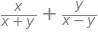

In [14]:
x,y,z,a,b=symbols('x y z a b')
a=y/(x-y)+x/(x+y)
a

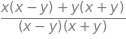

In [15]:
together(a)

Можно попытаться переписать выражение в наиболее простом виде, для этого используется функция simplify

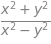

In [16]:
simplify(a)

Разложить на элементарные дроби по отношению к x 

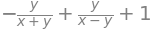

In [17]:
b=apart(a,x)
b

т.к.

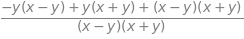

In [18]:
together(b)

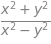

In [19]:
cancel(together(b))

# 2.3 Решение алгебраических уравнений

In [20]:
a,b,c,d,e,f=symbols('a b c d e f')

Как известно, алгебраические уравнения до 4 степени включительно имеют решение в радикалах:

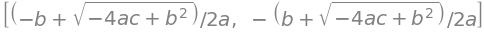

In [21]:
sm.solve(a*x**2+b*x+c,x)

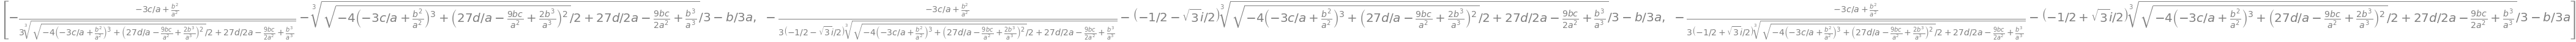

In [22]:
sm.solve(a*x**3+b*x**2+c*x+d,x)

Функция roots возвращает численное значение корней многочлена с их множественностями.

In [23]:
sol = sm.roots(x**3-3*x+2,x)
sol

In [24]:
# обратите внимание на тип:
type(sol)

dict

# 2.4. Пределы

Пусть задана числовая последовательность
$$x_{n}=\frac{5n^2+2n}{7n^2-3n}$$

In [25]:
n=symbols('n')
xn = (5*n**2+2*n)/(7*n**2-3*n)

Рассмотрим разность двух членов последовательности $x_{n+1}-x_{n}$

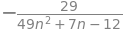

In [26]:
# subs - stand for substitute
# .subs({n:n+1}) - подстановка вместо символа n значения n+1
# аналогично .subs(n, n+1)
xnn=simplify(xn.subs({n:n+1})-xn)
xnn

или, что то же самое

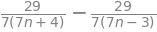

In [27]:
# разложим на элементарные дроби
xnn=apart(xnn,n)
xnn

In [28]:
print('Последовательность ' + 'не ' * int(bool(xnn.subs({n:1}) > 0)) + 'является убывающей')

Последовательность является убывающей


Вычислим предел последовательности

In [29]:
LimXn = limit(xn, n, oo); # oo == sympy.core.numbers.Infinity
print('\n Предел последовательности xn равен:', LimXn);


 Предел последовательности xn равен: 5/7


# Пример. Вычисление предела с помощью критерия Коши

Критерий Коши: последовательность сходится если для любого $\epsilon$ существует такое N, что для двух любых номеров $m,n>N$ верно $|x_{n}-x_{m}|<\epsilon$.

То есть начиная с некоторого $N$ __ВСЕ__ элементы последовательности находятся на расстоянии не больше $\epsilon$

In [30]:
# ограничение: находит только первые соседние элементы, расстояние между которыми < eps
def Cauchy_convergence(xn, eps):
    
    for j in range(100, 10000): 
        
        xn1=xn.subs({n:j-1})
        xn2=xn.subs({n:j})
        
        if (abs(xn2-xn1) < eps): 
            break
    
    return abs(xn2-xn1), j

In [31]:
# зададимся величиной эпсилон
eps = 1.e-6

XnXn, N = Cauchy_convergence(xn, eps)
        
LimXnNum = xn.subs({n:N}).n()

In [32]:
print('Предел числовой последовательности xn (аналитически) равен:', float(LimXn));
print('Предел числовой последовательности xn (по кр. Коши при eps =%12.5e, N=%i) равен:' % (eps, N), LimXnNum);
print('Разность этих значений равна:', abs(float(LimXn)-LimXnNum));

Предел числовой последовательности xn (аналитически) равен: 0.7142857142857143
Предел числовой последовательности xn (по кр. Коши при eps = 1.00000e-06, N=771) равен: 0.715053763440860
Разность этих значений равна: 0.000768049155145945


# 2.5. Производная

Рассмотрим функцию $y = x^2$, и приращение аргумента $dx$, приводящее к приращению функции $dy$:

In [33]:
x,y,dx,dy=symbols('x y dx dy')
y=x**2
dy=y.subs({x:x+dx})-y.subs({x:x})
Math('y = ' + latex(y))

<IPython.core.display.Math object>

In [34]:
dy=y.subs({x:x+dx})-y.subs({x:x})
Math('dy =' + latex(dy))

<IPython.core.display.Math object>

Найдём предел отношения $\frac{dy}{dx}$ при $dx \to 0$:

In [35]:
dydx = dy/dx
Math(r'\frac{dy}{dx} = ' + latex(dydx))

<IPython.core.display.Math object>

In [36]:
limdydx = limit(dy/dx,dx,0)
Math(r'\lim\limits_{dx \to 0}\frac{dy}{dx} = ' + latex(limdydx))

<IPython.core.display.Math object>

Определение. Такой предел называют производной функции $y(x)$ по $x$.

# Упражнение 2. Производные как предел

Найдите с помощью предела производные следующих функций:

$$ y = sin(x), \quad y=ln(x), \quad y=6sin(3x)-tan(x^2)+e^{6x} $$

В пакете символьных вычислений можно находить производную напрямую:

In [37]:
x,y=symbols('x y')

f=x*sm.sin(x+y);
print('\n Исходная функция f(x,y):', f);

# Вычислим частные производные функции:
fx=diff(f,x);
fy=diff(f,y);
print('\n Производные функции f(x,y) по x:', fx);
print('\n Производные функции f(x,y) по y:', fy);

# Вторая производная по x и первая по y
fxxy=diff(f,x,2,y);
print('\n Производные функции f(x,y) по xx и y:', fxxy);


 Исходная функция f(x,y): x*sin(x + y)

 Производные функции f(x,y) по x: x*cos(x + y) + sin(x + y)

 Производные функции f(x,y) по y: x*cos(x + y)

 Производные функции f(x,y) по xx и y: -(x*cos(x + y) + 2*sin(x + y))


# Упражнение 3. Производные

Проверьте правильность найденных ранее с помощью предела производных.

# 3. Нелинейные уравнения и системы.

# 3.1. Алгоритмы для решения нелинейного уравнения 

Нас интересуют задачи вида: $f(x) = 0$.

Пусть есть некоторая функция $f(x)=(1+x+x^2) \cdot e^{-x}+\sin(x+0.1)-1$.

In [84]:
def f(x):
    return ((1.0 + x + x**2) * math.exp(-x) + math.sin(x+0.1) - 1.0)

Построим график этой функции

<IPython.core.display.Javascript object>


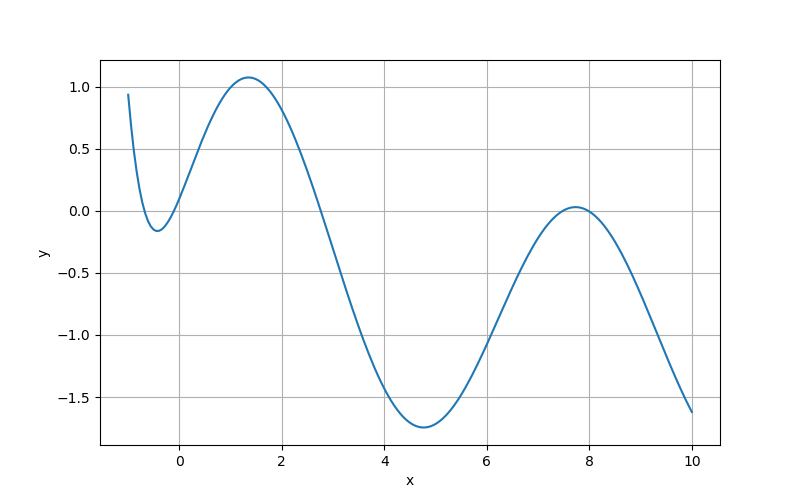

In [85]:
A = -1.0
B =  10.0
N =  200
Y = np.zeros(N)
X = np.linspace(A, B, N)
for i in range(N):
    Y[i] = f(X[i])

plt.figure(figsize=(8,5))      
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Очевидно, что корень может находиться толькро между точками a и b, для которых справедливо: $f(a)>0, f(b)<0$ или $f(a)<0, f(b)>0$, т.е. $f(a)\cdot f(b)<0$. Найдём такие точки a и b переберая значения x в некотором интервале

In [112]:
n=20
AB = np.zeros((2,n))
xab = np.linspace(A, B, n)
ia=0
for i in range(n-1):
    if f(xab[i])*f(xab[i+1])<0:
        AB[0][ia]=xab[i]
        AB[1][ia]=xab[i+1]
        print ('\t %i \t %.10e \t %.10e' %(ia, AB[0][ia], AB[1][ia]))
        ia=ia+1
print('Найдено %i интервалов локализации корня.' %(ia))

	 0 	 -1.0000000000e+00 	 -4.2105263158e-01
	 1 	 -4.2105263158e-01 	 1.5789473684e-01
	 2 	 2.4736842105e+00 	 3.0526315789e+00
	 3 	 7.1052631579e+00 	 7.6842105263e+00
	 4 	 7.6842105263e+00 	 8.2631578947e+00
Найдено 5 интервалов локализации корня.


<IPython.core.display.Javascript object>


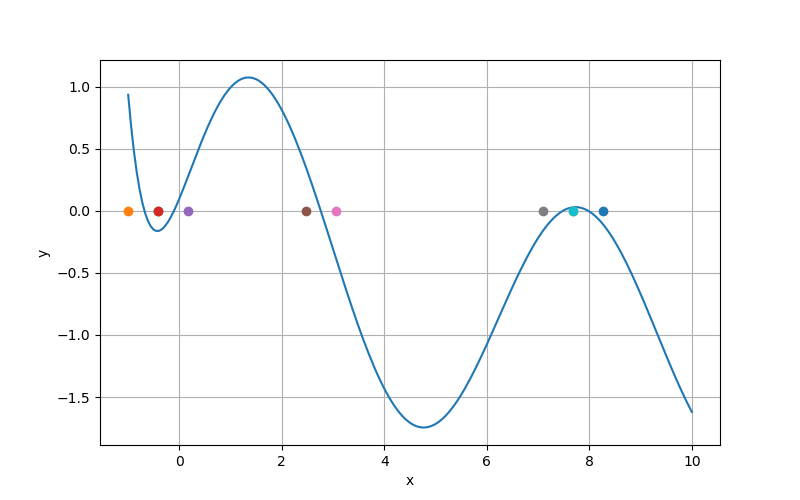

In [113]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 3.2 Метод деления отрезка пополам (Метод бисекции)

In [114]:
def bisection(f, x1, x2, pr=0, tol=1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка интервала
    :param x2: - правая точка интервала
    :param pr: - параметр выдачи итераций (pr=0 - не выводить итерации, pr=1 - выводить итерации)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    
    if f1*f2 > 0.:
        print('f(x1) и f(x2) не должны иметь одинаковый знак')
        return
    
    Error=abs(x1-x2)
    n = int(math.ceil(np.log(abs(x2-x1)/tol)/np.log(2.))) # оценка количества итераций для достижения заданной точности
    
    for i in range(n):
        Error0=Error
        x3 = 0.5*(x1+x2)
        f3 = f(x3)
        if f2*f3 < 0.:
            x1=x3
            f1=f3
        else:
            x2=x3
            f2=f3
        Error=abs(x1-x2)
        k=np.log(Error)/np.log(Error0)
        if pr>0:
            print('итерация:\t%i \t%.6e \t%.3f' % (i, Error, k))
    return (x1+x2)/2

In [115]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisection(f, AB[0][i], AB[1][i], pr=0)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -6.8256428205e-01 	 f(root[0]) =   4.0557335268e-11
	 1 	 root[1] =  -1.0653060478e-01 	 f(root[1]) =  -1.6943224601e-11
	 2 	 root[2] =   2.7584180781e+00 	 f(root[2]) =  -3.5366154449e-11
	 3 	 root[3] =   7.4839086268e+00 	 f(root[3]) =   2.9021229864e-13
	 4 	 root[4] =   7.9776600799e+00 	 f(root[4]) =  -1.9744206270e-12


<IPython.core.display.Javascript object>


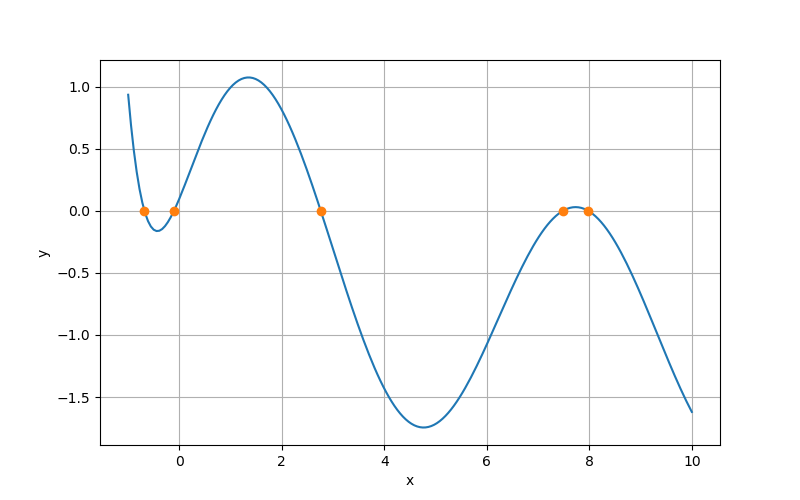

In [116]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 3.3 Метод Ньютона

Задана функция

In [117]:
x=symbols('x')
F = (1.0 + x + x**2) * sm.exp(-x) + sm.sin(x + 0.1) - 1.0;
F

Вычислим производную заданной функции

In [118]:
FX = diff(F,x)
FX

In [119]:
def fx(a):
    return FX.subs({x:a}).n() # .n() - представление в виде десятичной дроби

In [120]:
def newton(f, x, pr=0, tol=1.0e-10):
    Error=2
    i=0
    while Error>tol:
        Error0=Error
        x0=x
        x = x0 - f(x0)/fx(x0)
        Error=math.fabs(x-x0)
        k=np.log(Error)/np.log(Error0)
        i=i+1
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x

Рассмотрим в качестве начального приближения левые точки отрезков локализации:

In [121]:
xRootA = np.zeros((2,ia))

for i in range(ia): 
    xRootA[0][i] = newton(f, AB[0][i], pr=0)
    xRootA[1][i] = f(xRootA[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRootA[0][i], i, xRootA[1][i]))   

	 0 	 root(0) =  -6.8256428202e-01 	 f(root[0]) =  -3.3306690739e-16
	 1 	 root(1) =   2.7584180781e+00 	 f(root[1]) =   0.0000000000e+00
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   7.4839086268e+00 	 f(root[3]) =   2.2204460493e-16
	 4 	 root(4) =   7.4839086268e+00 	 f(root[4]) =  -1.1102230246e-16


<ipython-input-120-9536783acf44>:9: RuntimeWarning: divide by zero encountered in log
  k=np.log(Error)/np.log(Error0)


<IPython.core.display.Javascript object>


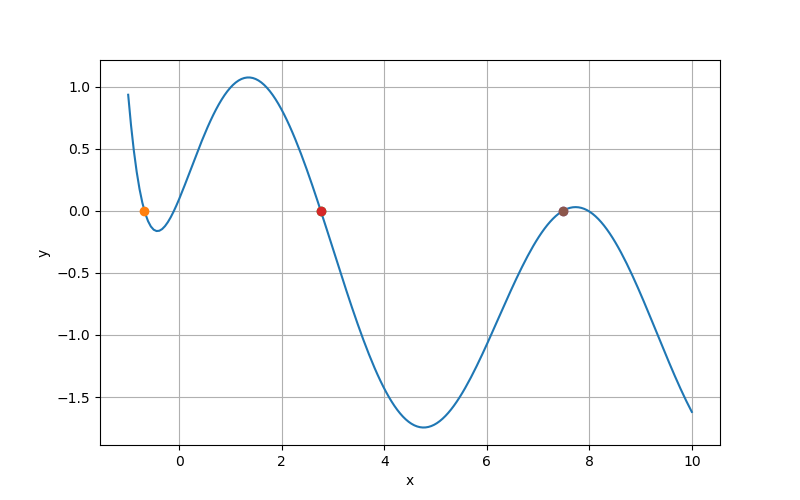

In [122]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootA[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Рассмотрим в качестве начального приближения правые точки отрезков локализации:

In [123]:
xRootB = np.zeros((2,ia))

for i in range(ia): 
    xRootB[0][i] = newton(f, AB[1][i], pr=0)
    xRootB[1][i] = f(xRootB[0][i])
    print('\t %i \t root(%i) = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRootB[0][i], i, xRootB[1][i])) 

	 0 	 root(0) =   2.7584180781e+00 	 f(root[0]) =   0.0000000000e+00
	 1 	 root(1) =  -1.0653060476e-01 	 f(root[1]) =  -1.1102230246e-16
	 2 	 root(2) =   2.7584180781e+00 	 f(root[2]) =   0.0000000000e+00
	 3 	 root(3) =   7.4839086268e+00 	 f(root[3]) =  -1.1102230246e-16
	 4 	 root(4) =   7.9776600799e+00 	 f(root[4]) =   2.2204460493e-16


<ipython-input-120-9536783acf44>:9: RuntimeWarning: divide by zero encountered in log
  k=np.log(Error)/np.log(Error0)


<IPython.core.display.Javascript object>


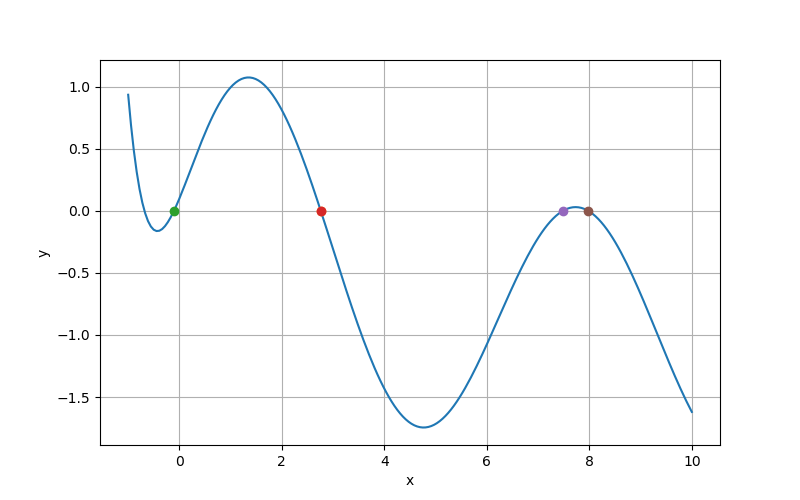

In [124]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(xRootB[0][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Видно, что решение из крайних точек отрезков локализации корня сходится к разным решениям. Это обусловленно локальными свойствами функции - поведением производной. 

# Решение системы нелинейных уравнений

# 3.4. Методом Ньютона 

Нас интересуют задачи вида:
\begin{cases}
   f(x_1,x_2) = 0
   \\
   g(x_1,x_2) = 0
\end{cases}

Рассмотрим систему:
\begin{cases}
   4(x_2-1)^2+(x_1-1)^2-1 = 0
   \\
   x_2 - x_1 sin(25x_1) = 0
\end{cases}

Построим график этой функции

In [125]:
def f1(x1, x2):
    return (4.0*(x2 - 1.0)**2 + (x1 - 1.0)**2 - 1.0)

def f2(x1, x2):
    return (x2 - x1*math.sin(25.0*x1))

def X22(x1):
    return x1*math.sin(25.0*x1)

def X21p(x1):
    return (math.sqrt((1.0 - (x1 - 1.0)**2)/4.0)+1.0)

def X21m(x1):
    return (-math.sqrt((1.0 - (x1 - 1.0)**2)/4.0)+1.0)

<IPython.core.display.Javascript object>


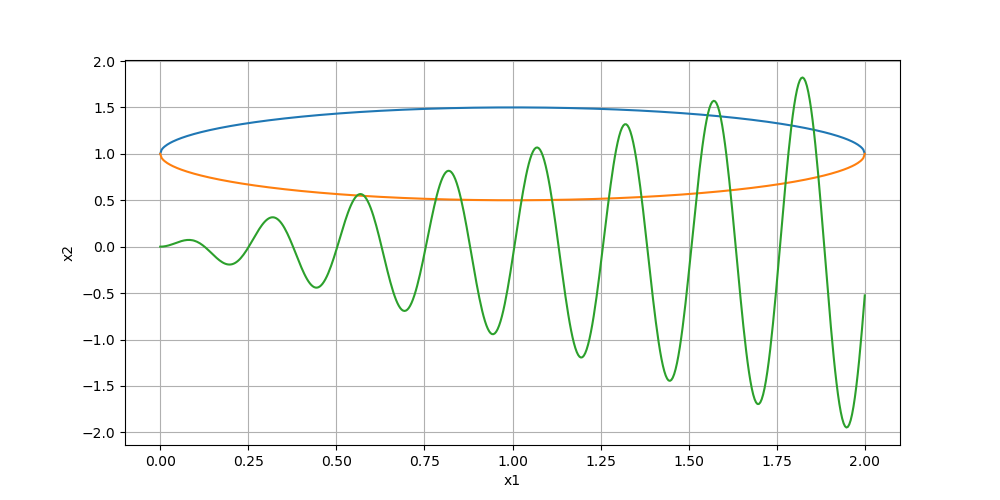

In [126]:
A = 0.0
B = 2.0
N = 500
y21p = np.zeros((N))
y21m = np.zeros((N))
y22 = np.zeros((N))
x = np.linspace(A, B, N)
for i in range(N): 
    y21p[i] = X21p(x[i])
    y21m[i] = X21m(x[i])
    y22[i]  =  X22(x[i])
    
plt.figure(figsize=(10,5))  
plt.plot(x, y21p, x, y21m, x, y22)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Вычислим производные этих функций и сформируем матрицу Якоби:

In [127]:
x1, x2 = symbols('x1, x2')

F1 = 4.0*(x2 - 1.0)**2 + (x1 - 1.0)**2 - 1.0;

F2 = x2 - x1*sm.sin(25.0*x1)

Найдём частные производные: 
$$\frac{\partial f_1(x_1,x_2)}{\partial x_1}, \frac{\partial f_1(x_1,x_2)}{\partial x_2}, \frac{\partial f_2(x_1,x_2)}{\partial x_1}, \frac{\partial f_2(x_1,x_2)}{\partial x_2}$$

In [128]:
F1X1 = diff(F1,x1)
F1X1

In [129]:
F1X2 = diff(F1,x2)
F1X2

In [130]:
F2X1 = diff(F2,x1)
F2X1

In [131]:
F2X2 = diff(F2,x2)
F2X2

Сформируем из них матрицу Якоби:
$$J = 
\begin{pmatrix}
  \frac{\partial f_1(x_1,x_2)}{\partial x_1} \frac{\partial f_1(x_1,x_2)}{\partial x_2}\\
  \frac{\partial f_2(x_1,x_2)}{\partial x_1} \frac{\partial f_2(x_1,x_2)}{\partial x_2}
\end{pmatrix}
$$

In [132]:
J=sm.Matrix([[F1X1,F1X2],[F2X1,F2X2]])
J

⎡             2⋅x₁ - 2.0               8.0⋅x₂ - 8.0⎤
⎢                                                  ⎥
⎣-25.0⋅x₁⋅cos(25.0⋅x₁) - sin(25.0⋅x₁)       1      ⎦

Программа для решения систем нелинейных уравнений методом Ньютона:

In [133]:
def NEWTON(n, fun, Jac, x0, pr=0, tol=1.0e-10): 
    x = np.zeros(n)
    b = np.zeros(n)
    A = np.zeros((n,n)) 
    dx = np.zeros(n)
    xStep = np.zeros((1000,n))
    Error=2
    i=0
    x[:]=x0[:]
    xStep[i][:]=x[:]
    while Error>tol and i<999:
        Error0=Error 
        b=-fun(x)
        A=Jac(x)
        dx = np.dot(linalg.pinv(A),b)
        x[:]=x[:]+dx[:]
        Error=math.sqrt(np.dot(dx.T,dx))
        k=np.log(Error)/np.log(Error0)
        i=i+1
        xStep[i][:]=x[:]
        if pr>0:
            if i>1: print('итерация:\t%i \t%.6e \t ' %(i, Error), k)
            else:   print('итерация:\t%i \t%.6e \t ' %(i, Error))
    return x, xStep, i

Программы для вычсления значения функций и Якобиана:

In [134]:
def fun(x):
    f = np.zeros(2)
    f[0] = f1(x[0],x[1])
    f[1] = f2(x[0],x[1])
    return f 

def jac(x):
    JJ = J.subs({x1:x[0],x2:x[1]}).n()
    M = np.array( [[float(JJ[0,0]), float(JJ[0,1])], [float(JJ[1,0]), float(JJ[1,1])]] )
    return M

Выберем начальное приближение:

<IPython.core.display.Javascript object>


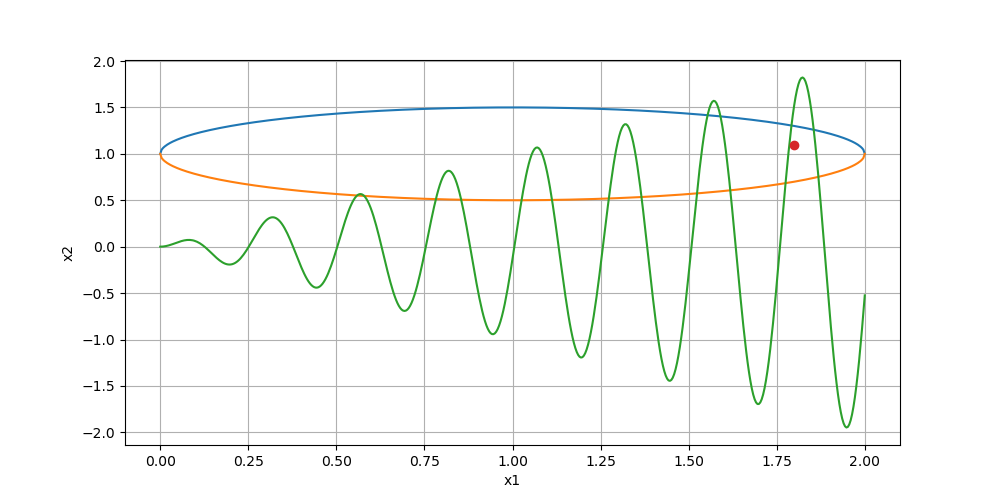

In [156]:
x10=1.8
x20=1.1

# попробуйте:
#x10=1.0
#x20=1.0

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(x10, x20, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

Значение Якобиана в начальное точке

In [157]:
jac([x10, x20])

array([[  1.6       ,   0.8       ],
       [-24.49039302,   1.        ]])

 x1 = 1.791933e+00 	 x2 = 1.305304e+00 	 f1(x1,x2) = 0.000000e+00 	 f1(x1,x2) = 4.662937e-15


<IPython.core.display.Javascript object>


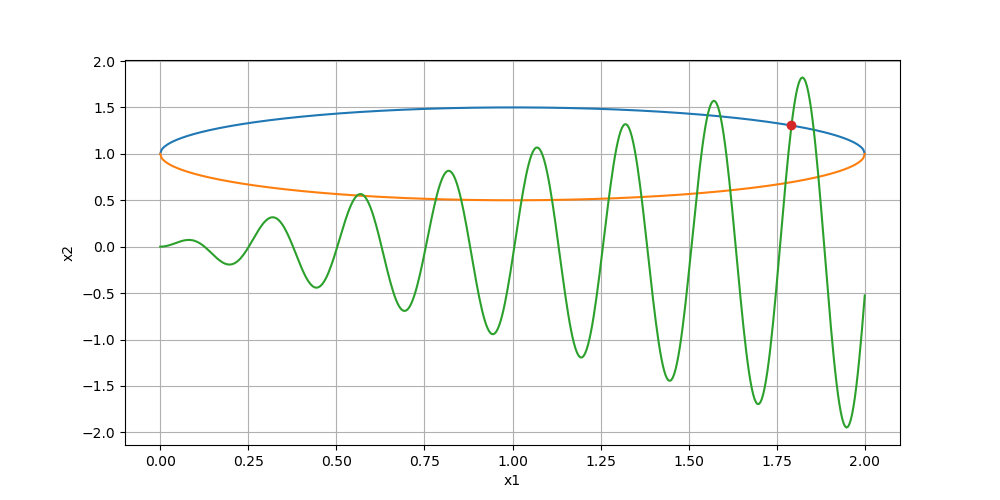

In [158]:
X0 = np.array([x10, x20])
sol, xStep, iStep = NEWTON(2, fun, jac, X0, pr=0, tol=1.0e-10)

print(' x1 = %12.6e \t x2 = %12.6e \t f1(x1,x2) = %12.6e \t f1(x1,x2) = %12.6e' 
      %(sol[0],sol[1], f1(sol[0],sol[1]), f2(sol[0],sol[1]))) 

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(sol[0], sol[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


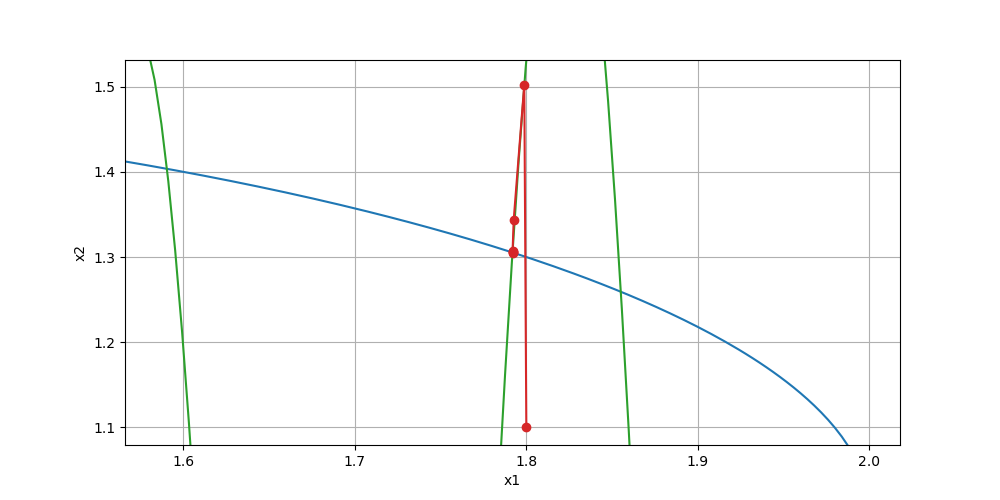

In [159]:
r = sol[:] - X0[:]
R = 1.1*math.sqrt(np.dot(r.T,r))

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(xStep[0:iStep+1,0], xStep[0:iStep+1,1], '-o')
plt.xlim(sol[0]-R, sol[0]+R)
plt.ylim(sol[1]-R, sol[1]+R)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# 3.5 Функция root 

    fjac: array([[-0.05025335,  0.9987365 ],
       [-0.9987365 , -0.05025335]])
     fun: array([4.44089210e-16, 3.21964677e-14])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-9.79928722e-11,  5.98241088e-12])
       r: array([-31.50774661,   0.80310234,  -2.48516491])
  status: 1
 success: True
       x: array([1.79193318, 1.30530388])


<IPython.core.display.Javascript object>


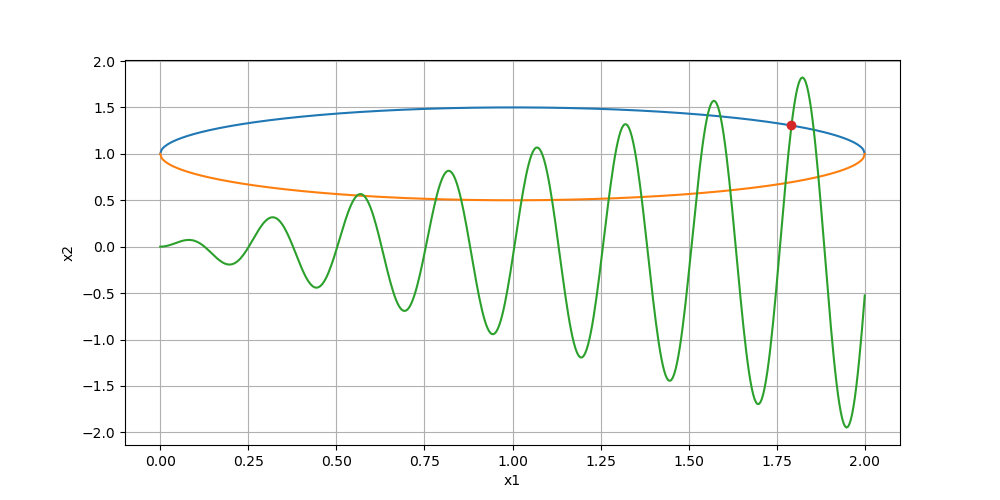

In [160]:
SOL = root(fun, X0, jac=jac, method='hybr')

print(SOL)

plt.figure(figsize=(10,5))
plt.plot(x, y21p, x, y21m, x, y22)
plt.plot(SOL.x[0], SOL.x[1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# 4. Алгоритмы минимизации нелинейной функции одной переменной 

Нас интересуют задачи вида: $f(x) -> min$.

Пусть есть некоторая функция $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$.

In [161]:
def f(x):
    return ((1.0 + x + x**2) * math.exp(-x) + math.sin(x+0.1) - 1.0)

Построим график этой функции

<IPython.core.display.Javascript object>


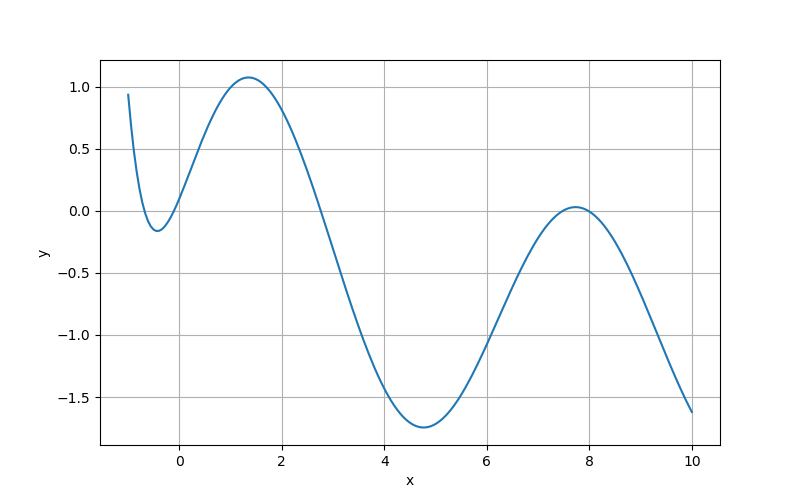

In [162]:
A = -1.0
B =  10.0
N =  200
Y = np.zeros((N))
X = np.linspace(A, B, N)
for i in range(N): 
    Y[i] = f(X[i])
    
plt.figure(figsize=(8,5))  
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Очевидно, что экстремум может находиться только между точками a и b, для которых справедливо: $f'(a)>0, f'(b)<0$ - для максимума или $f'(a)<0, f(b)'>0$ - для минимума, т.е. $f'(a)\cdot f'(b)<0$. Найдём такие точки a и b переберая значения x в некотором интервале

Вычислим производную:

In [108]:
x=symbols('x')

F = (1.0 + x + x**2) * sm.exp(-x) + sm.sin(x+0.1) - 1.0

FX = diff(F,x)
FX

In [109]:
def fx(a):
    return FX.subs({x:a}).n()

In [110]:
n=30
AB = np.zeros((2,n))
xab = np.linspace(A, B, n)
ia=0
for i in range(n-1):
    if fx(xab[i])*fx(xab[i+1])<0:
        AB[0][ia]=xab[i]
        AB[1][ia]=xab[i+1]
        print ('\t %i \t %.10e \t %.10e' %(ia, AB[0][ia], AB[1][ia]))
        ia=ia+1
print('Найдено %i интервалов локализации экстремума.' %(ia))

	 0 	 -6.2068965517e-01 	 -2.4137931034e-01
	 1 	 1.2758620690e+00 	 1.6551724138e+00
	 2 	 4.6896551724e+00 	 5.0689655172e+00
	 3 	 7.7241379310e+00 	 8.1034482759e+00
Найдено 4 интервалов локализации экстремума.


<IPython.core.display.Javascript object>


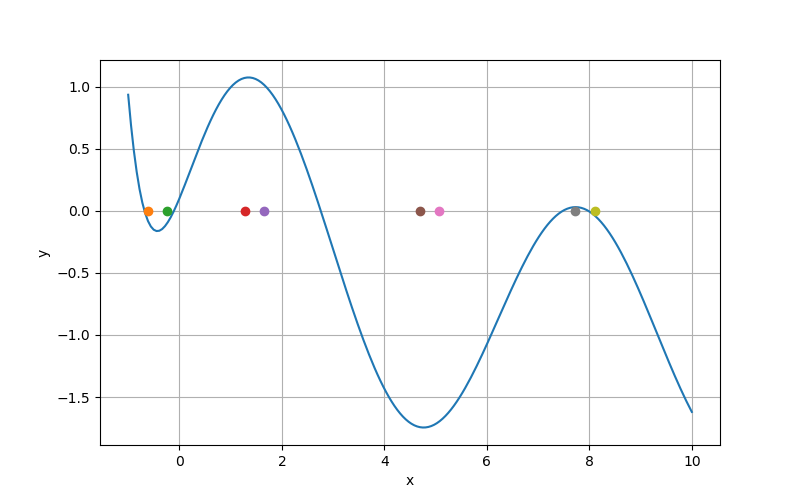

In [111]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


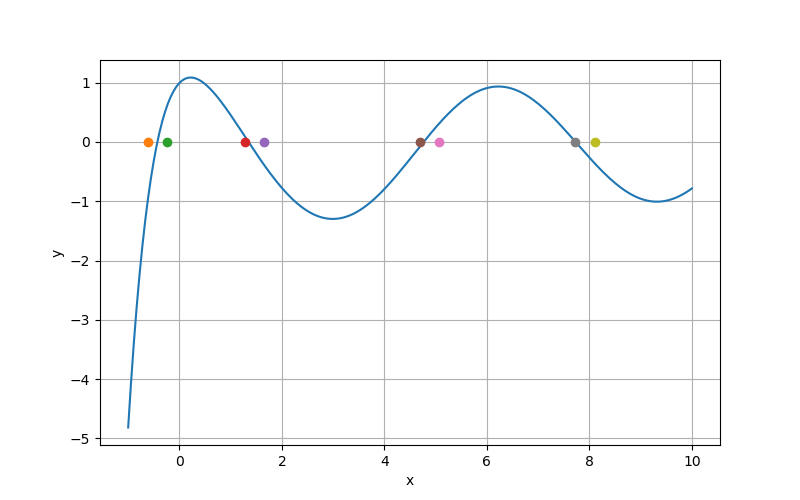

In [112]:
Yx = np.zeros((N))
for i in range(N): 
    Yx[i] = fx(X[i])

plt.figure(figsize=(8,5))      
plt.plot(X, Yx, '-')
for i in range(ia): 
    plt.plot(AB[0][i], 0, 'o')
    plt.plot(AB[1][i], 0, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 4.1 Метод дихотомии

In [115]:
def bisectionMin(f, x1, x2, mm=0, tol=1.0e-10):
    """
    Ищет корень уравнения f(x)=0
    на отрезке [x1, x2] методом дихотомии (бисекции).
    Значения функций на концах отрезка не могут иметь один знак.
    :param f: - функция
    :param x1: - левая точка мнтервала
    :param x2: - правая точка мнтервала
    :param mm: - параметр типа экстремума (pr=0 - mim, pr=1 - max)
    :param tol: - точность
    :return:
    """
    f1 = f(x1)
    f2 = f(x2)
    a = (1.0 + np.sqrt(5.0))/2.0
    
    Error=abs(x1-x2)
    for i in range(n):
        Error0=Error
        d = (x2-x1)*(1.0/a - 1.0/2.0)
        x3 = 0.5*(x1+x2)+d
        x4 = 0.5*(x1+x2)-d
        f3 = f(x3)
        f4 = f(x4)
        if mm==0:
            if f3 > f4:
                x2=x3
                f2=f3
            else:
                x1=x4
                f1=f4
        else:
            if f3 < f4:
                x2=x3
                f2=f3
            else:
                x1=x4
                f1=f4
        Error=abs(x1-x2)
    return (x1+x2)/2

In [116]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i])
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -4.3018957759e-01 	 f(root[0]) =  -1.6356739805e-01
	 1 	 root[1] =   1.6551723119e+00 	 f(root[1]) =   1.0137704728e+00
	 2 	 root[2] =   4.7658265912e+00 	 f(root[2]) =  -1.7457293412e+00
	 3 	 root[3] =   8.1034481739e+00 	 f(root[3]) =  -3.7827206420e-02


<IPython.core.display.Javascript object>


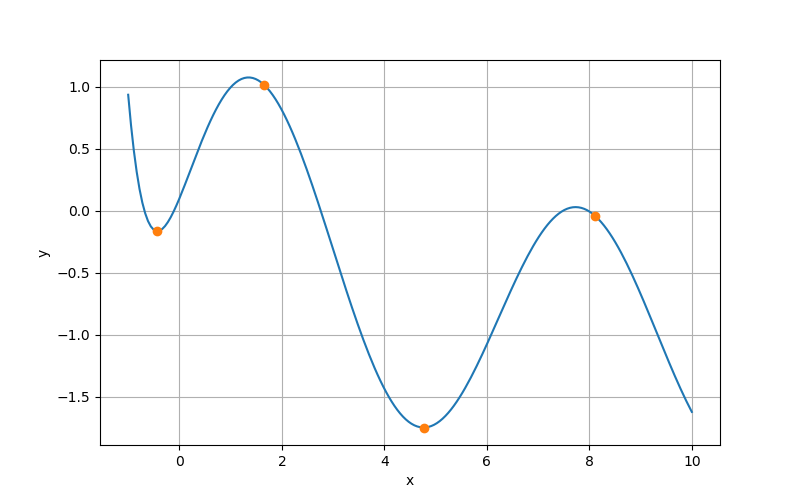

In [117]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [118]:
xRoot = np.zeros((2,ia))

for i in range(ia): 
    xRoot[0][i] = bisectionMin(f, AB[0][i], AB[1][i], mm=1)
    xRoot[1][i] = f(xRoot[0][i])
    print('\t %i \t root[%i] = %18.10e \t f(root[%i]) = %18.10e' %(i, i, xRoot[0][i], i, xRoot[1][i]))    

	 0 	 root[0] =  -6.2068955323e-01 	 f(root[0]) =  -7.5224927500e-02
	 1 	 root[1] =   1.3484834753e+00 	 f(root[1]) =   1.0743944863e+00
	 2 	 root[2] =   5.0689654153e+00 	 f(root[2]) =  -1.6978096976e+00
	 3 	 root[3] =   7.7311372238e+00 	 f(root[3]) =   2.9807497755e-02


<IPython.core.display.Javascript object>


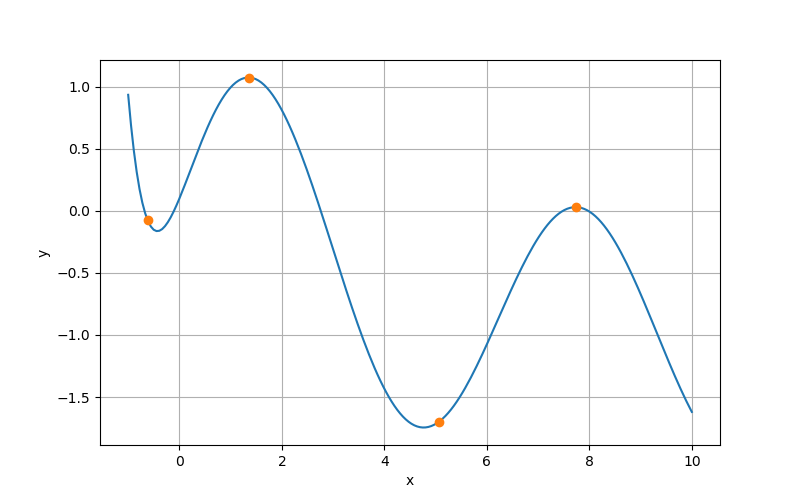

In [119]:
plt.figure(figsize=(8,5))  
plt.plot(X, Y, '-')
plt.plot(xRoot[0,:], xRoot[1,:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Экстремум функции несколькох переменных

Нас интересуют задачи вида:
   $$f(x_1,x_2) -> extr$$


# 4.2 Функция minimize 

In [120]:
from scipy.optimize import minimize, rosen, rosen_der

In [121]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

# Домашнее задание (базовое):

# Задание 1. Матрица Паскаля.

Напишите программу, вычисляющую матрицу Паскаля, эллементы которой определяются следующим соотношением:

$$ a_{ij} = \frac{(i+j-2)!}{(i-1)!(j-1)!}, \quad i=1,2,..., n, \quad j=1,2,..., n. $$

# Задание 2.

Напишите программу, вычисляющую обратную матрицу на основе решения матричного уравнения:

$$ AX = E. $$

Найдите таким образом обратную матрицу для матрицы Паскаля.

# Задание 3

Напишите программу реализующую метод секущих (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%85%D0%BE%D1%80%D0%B4).

# Задание 4

Постройте график и решить систему уравнений с помощью метода Ньютона и втроенной функции root:

\begin{cases}
   x_1^2+(x_2-\sqrt{|x_1|})^2 - 1 = 0
   \\
   x_1^2 x_2^3 - 7 x_1^3 x_2^3 - 7 = 0
\end{cases}

# Задание 5

Напишите программу реализующую метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F).

# Задание 6

Выполните Упражнение 8.2 (с. 213) из книги Численные методы. Вычислительный практикум (Вабищевич П.Н. - 2010).

# Задание 7

Найти все максимумы и минимумы с помощью разработанных программ (методом градиентного спуска) рассматриваемой функции $f(x)=(1+x+x^2) \cdot e^{-x}+sin(x+0.1)-1$ на отрезки [-1.0;25]. Определить глобальный максимум (наибольший локальный максимум) и минимум на этом отрезке.

# Домашнее задание (дополнительное):

# Задание Штрафы. 

Напишите программу для нахождеиия минимума функции одной переменной f(x) на интервале [а, b] при ограничениях g(х) > 0 
методом штрафа с использованием метода золотого сечения для решения задачи безусловной минимизации. 

С ее помощью найдите минимум функции $e^{-x}x$ при $x >= 2$.

# Задание. Определитель.

Напишите программу для вычисления определителя матрицы произвольной размерности методом разложения по строке или столбцу (https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C).

# Задание. Области притяжения.

Как мы уже поняли у каждого корня есть своя область притяжения (окрестность выбирая начальное приближение из которой можно получить этот корень с помощью итерационного метода, например метода Ньютона). Постройте для системы уравнений из задания 4 область притяжения каждого корня.
